In [3]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from src import *
import networkx as nx
from scipy.stats import beta
from sklearn.manifold import MDS
from numpy.linalg import eigh
import os
import json

In [22]:
mean_infections = []
ps = []
plist = set()
clist = set()
rlist = set()
beta = []
frac = []


data_dir = "Data/erdos-renyi_experiment/"
for f in os.listdir(data_dir):

    d = f.split(".json")[0].split("-")
    p = float(d[0])
    c = int(d[1])
    r = int(d[2])

    plist.add(p)
    clist.add(c)
    rlist.add(r)

plist = sorted(plist)
clist = sorted(clist)
rlist = sorted(rlist)

p_dict = dict(zip(plist, range(len(plist))))
c_dict = dict(zip(clist, range(len(clist))))
r_dict = dict(zip(rlist, range(len(rlist))))


psmat = np.zeros((len(plist), len(clist), len(rlist)))
ipn = np.zeros((len(plist), len(clist), len(rlist)))

for f in os.listdir(data_dir):
    d = f.split(".json")[0].split("-")
    p = float(d[0])
    c = int(d[1])
    r = int(d[2])
    i = p_dict[p]
    j = c_dict[c]
    k = r_dict[r]

    fname = os.path.join(data_dir, f)

    with open(fname, "r") as file:
        data = json.loads(file.read())
    
    x = np.array(data["x"])
    A = np.array(data["A"])
    samples = np.array(data["samples"])

    ipn[i ,j, k] += infections_per_node(x)

    psmat[i, j, k] += posterior_similarity(A, samples)

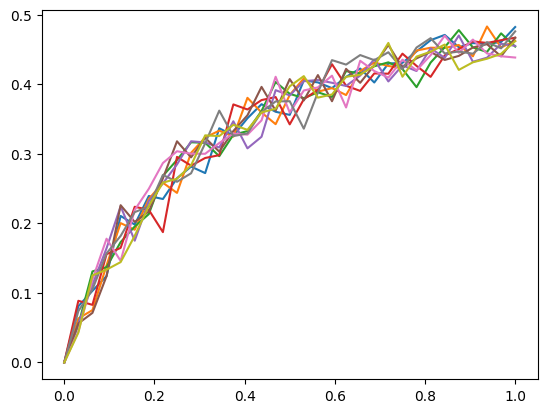

In [23]:
for i in c_dict:
    plt.plot(plist, psmat[:, c_dict[i]])